# Lista 03

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Questão 01

In [2]:
def change_contrast_brightness(image_path: str = "cabuloso.jpg", brightness_rate: float = 0, change_contrast: bool = False, contrast_rate: float = 0, to_show: bool = True):
    """
    Altera o brilho e/ou o contraste de uma imagem.

    Args:
        image_path (str): Caminho para a imagem (padrão: "cabuloso.jpg").
        brightness_rate (float): Valor da alteração do brilho (intervalo: [-1, 1]).
        change_contrast (bool): Se True, altera o contraste (padrão: False).
        contrast_rate (float): Valor da alteração do contraste (intervalo: [0, 1]).
        to_show (bool): Se True, exibe as imagens (padrão: True).

    Returns:
        numpy.ndarray or None: Imagem resultante após a alteração de brilho e contraste.
            Retorna None se to_show for False.
    """
    # Carrega a imagem e normaliza os valores para o intervalo [0, 1]
    image = np.array(Image.open(image_path)) / 255

    # Aplica a alteração de brilho, o método clip garante que os valores não vão estrapolar 0 e 1
    imagem_final = np.clip(image + brightness_rate, 0, 1)

    if change_contrast:
        # Aplica a alteração de contraste
        imagem_final = (imagem_final - 0.5) * contrast_rate + 0.5 # a escolha do 0.5 é por conta do intervalo do contrast_rate
        imagem_final = np.clip(imagem_final, 0, 1)

    if to_show:
        # Exibe as imagens
        plt.imshow(image)
        plt.title("Imagem Original")
        plt.axis('off')
        plt.show()

        plt.imshow(imagem_final)
        plt.title("Imagem Alterada")
        plt.axis('off')
        plt.show()
    else:
        return imagem_final

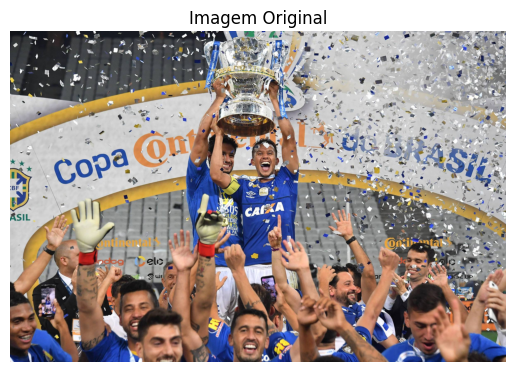

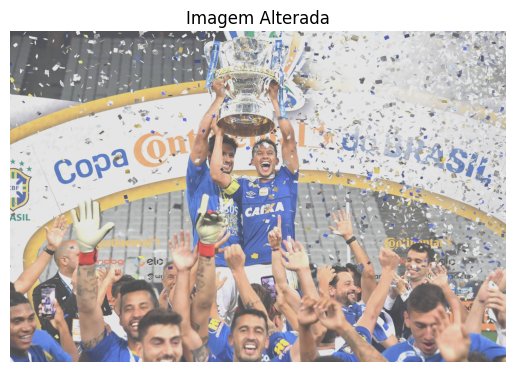

In [3]:
change_contrast_brightness(brightness_rate=0.2, change_contrast=True, contrast_rate=0.8)

## Questão 02

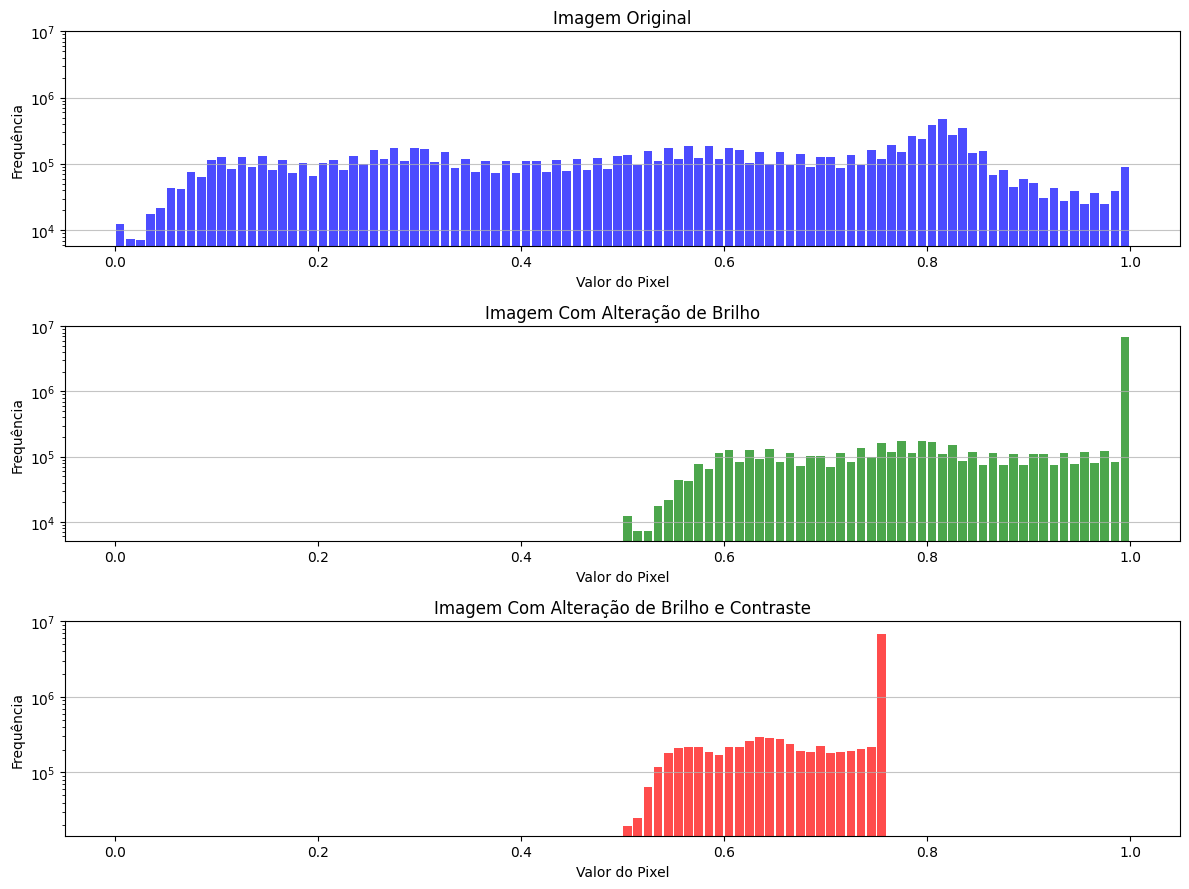

In [4]:
# Obtendo pixels da imagem original
pixels = change_contrast_brightness(to_show=False).flatten()

# Obtendo pixels da imagem alterada (apenas brilho)
pixels_2 = change_contrast_brightness(brightness_rate=0.5, to_show=False).flatten()

# Obtendo pixels da imagem alterada (brilho e contraste)
pixels_3 = change_contrast_brightness(brightness_rate=0.5, change_contrast=True, contrast_rate=0.5, to_show=False).flatten()

# Plotando histogramas
fig, axs = plt.subplots(3, 1, figsize=(12, 9))

# Histograma da imagem original
axs[0].hist(pixels, bins=100, range=(0, 1), color='blue', alpha=0.7, rwidth=0.85)
axs[0].set_title('Imagem Original') 
axs[0].set_xlabel('Valor do Pixel')  
axs[0].set_ylabel('Frequência') 
axs[0].grid(axis='y', alpha=0.75) 
axs[0].set_yscale('log') 
axs[0].set_ylim(top=10**7) 

# Histograma da imagem com alteração de brilho
axs[1].hist(pixels_2, bins=100, range=(0, 1), color='green', alpha=0.7, rwidth=0.85)
axs[1].set_title('Imagem Com Alteração de Brilho')  
axs[1].set_xlabel('Valor do Pixel')  
axs[1].set_ylabel('Frequência') 
axs[1].grid(axis='y', alpha=0.75) 
axs[1].set_yscale('log') 
axs[1].set_ylim(top=10**7)  

# Histograma da imagem com alteração de brilho e contraste
axs[2].hist(pixels_3, bins=100, range=(0, 1), color='red', alpha=0.7, rwidth=0.85)
axs[2].set_title('Imagem Com Alteração de Brilho e Contraste')  
axs[2].set_xlabel('Valor do Pixel')  
axs[2].set_ylabel('Frequência')  
axs[2].grid(axis='y', alpha=0.75)  
axs[2].set_yscale('log')  
axs[2].set_ylim(top=10**7)  

plt.tight_layout()  
plt.show()


Pelo que eu pude entender, minha função tem o mesmo objetivo que a função do openCV, mas implementa de forma diferente. Minha função possui alguns parâmetros diferentes e aplica as transformações de forma separada. Enquanto, a função do openCV faz de forma conjunta a transformação, o que torma ela mais eficiente. 

## Questão 03

In [5]:
def apply_filters(image_path: str = "cabuloso.jpg", kernel: np.ndarray = None, to_show: bool = True):
    """
    Aplica um filtro (convolução) a uma imagem usando o kernel fornecido.

    Argumentos:
    image_path (str): O caminho para a imagem a ser processada. Padrão é "cabuloso.jpg".
    kernel (np.ndarray): O kernel a ser aplicado à imagem. Deve ser uma matriz numpy.
    to_show (bool): Se True, exibe a imagem resultante após a aplicação do filtro. Se False, retorna a imagem resultante como uma matriz numpy. Padrão é True.

    Retorna:
    np.ndarray ou None: Se to_show for True, retorna None. Se to_show for False, retorna a imagem resultante como uma matriz numpy.

    """
    # Carrega a imagem
    image = np.array(Image.open(image_path))

    # Cria uma matriz para armazenar a imagem final após a aplicação do filtro
    final_image = np.zeros_like(image)

    # Verifica se a imagem é colorida ou em tons de cinza
    try:
        image_height, image_width, image_deep = image.shape
    except ValueError:
        image_height, image_width = image.shape
        image_deep = 1  # Se a imagem for em tons de cinza, define o número de canais como 1

    # Obtém as dimensões do kernel
    kernel_height, kernel_width = kernel.shape

    # Calcula a borda do kernel para lidar com o efeito da convolução
    borda_vertical = kernel_height // 2
    borda_horizontal = kernel_width // 2

    # Aplica a convolução em cada pixel da imagem
    for i in range(borda_vertical, image_height - borda_vertical):
        for j in range(borda_horizontal, image_width - borda_horizontal):

            # Seleciona a região da imagem correspondente ao tamanho do kernel
            regiao = image[i - borda_vertical:i + borda_vertical + 1,
                        j - borda_horizontal:j + borda_horizontal + 1]
            
            if len(image.shape) == 3:
                # Aplica a convolução em cada canal de cor separadamente
                for canal in range(image_deep):
                    final_image[i, j, canal] = np.sum(regiao[:, :, canal] * kernel)
            else:
                final_image[i, j] = np.sum(regiao * kernel)

    # Exibe ou retorna a imagem resultante
    if to_show:
        plt.imshow(final_image.astype(np.uint8), cmap='gray')
        plt.axis('off')
        plt.show()
    else:
        return final_image

#### Teste

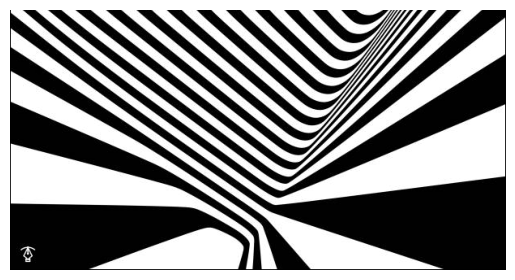

In [6]:
kernel_constante = np.array([[0, 0, 0],
                             [0, 1, 0],
                             [0, 0, 0]])

apply_filters(image_path="b_&_w.jpg", kernel=kernel_constante)

#### Constante

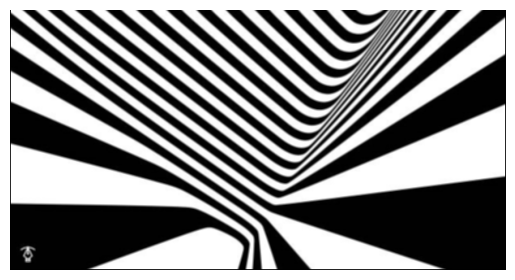

In [7]:
kernel_constante = np.array([[1/9, 1/9, 1/9],
                             [1/9, 1/9, 1/9],
                             [1/9, 1/9, 1/9]])

apply_filters(image_path="b_&_w.jpg", kernel=kernel_constante)

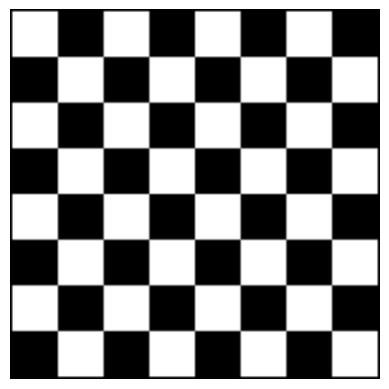

In [8]:
apply_filters(image_path="Chess_Board.svg", kernel=kernel_constante)

#### Derivada Horizontal

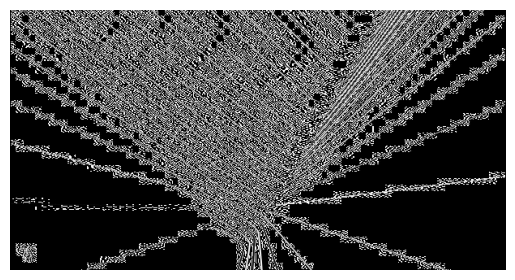

In [9]:
kernel_derivada_horizontal = np.array([[-1, 0, 1]])
apply_filters(image_path="b_&_w.jpg", kernel=kernel_derivada_horizontal)

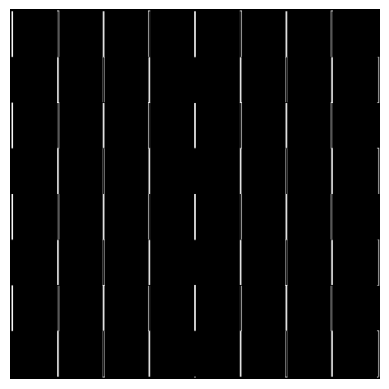

In [10]:
apply_filters(image_path="Chess_Board.svg", kernel=kernel_derivada_horizontal)

#### Derivada Vertical

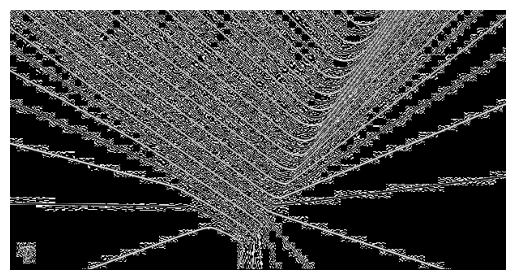

In [11]:
kernel_derivada_vertical = np.array([[-1],
                                     [ 0],
                                     [ 1]])

apply_filters(image_path="b_&_w.jpg", kernel=kernel_derivada_vertical)

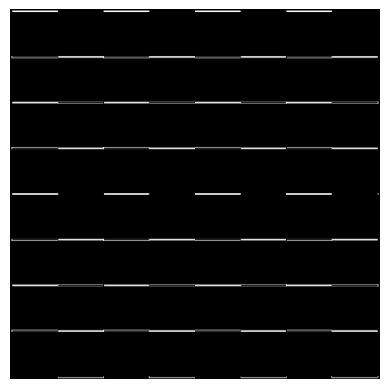

In [12]:
apply_filters(image_path="Chess_Board.svg", kernel=kernel_derivada_vertical)

#### Sobel Horizontal

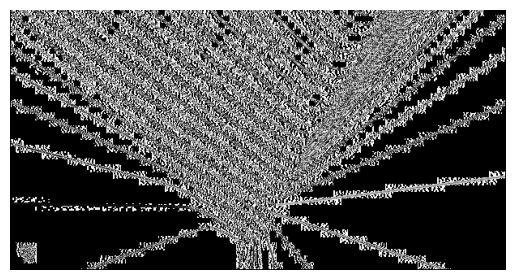

In [13]:
kernel_sobel_horizontal = np.array([[-1, 0, 1],
                                    [-2, 0, 2],
                                    [-1, 0, 1]])

apply_filters(image_path="b_&_w.jpg", kernel=kernel_sobel_horizontal)

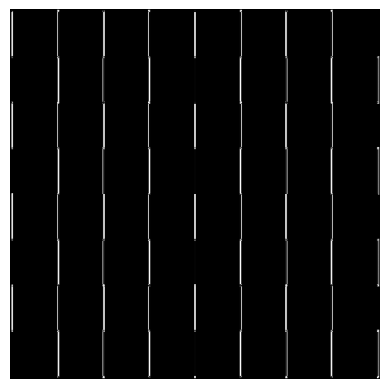

In [14]:
apply_filters(image_path="Chess_Board.svg", kernel=kernel_sobel_horizontal)

#### Sobel Vertical

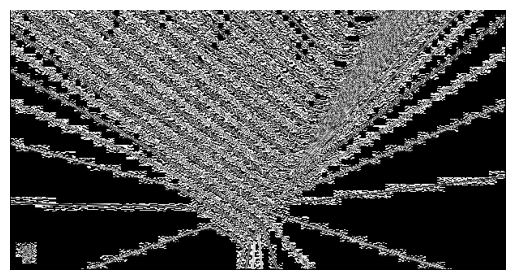

In [15]:
kernel_sobel_vertical = np.array([[-1, -2, -1],
                                  [ 0,  0,  0],
                                  [ 1,  2,  1]])

apply_filters(image_path="b_&_w.jpg", kernel=kernel_sobel_vertical)

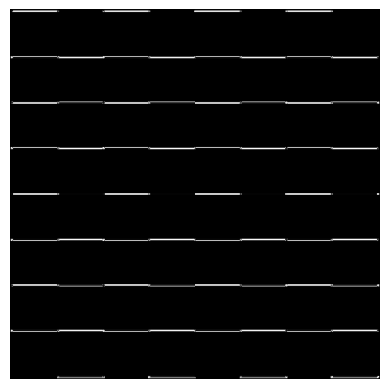

In [16]:
apply_filters(image_path="Chess_Board.svg", kernel=kernel_sobel_vertical)

#### Filtro Gaussiano

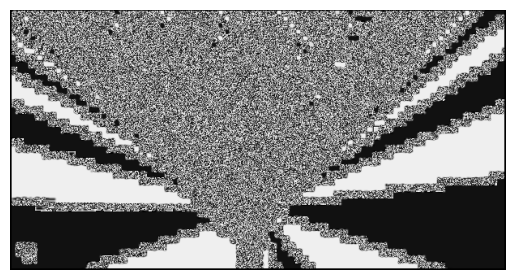

In [17]:
kernel_gaussiano = np.array([[1,  4,  7,  4, 1],
                              [4, 16, 26, 16, 4],
                              [7, 26, 41, 26, 7],
                              [4, 16, 26, 16, 4],
                              [1,  4,  7,  4, 1]])

apply_filters(image_path="b_&_w.jpg", kernel=kernel_gaussiano)

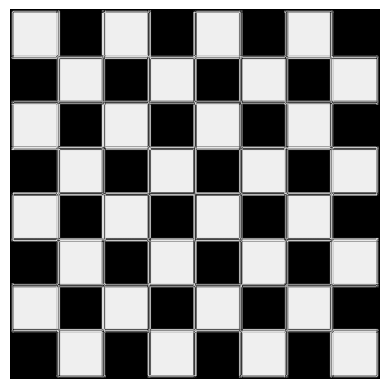

In [18]:
apply_filters(image_path="Chess_Board.svg", kernel=kernel_gaussiano)

## Questão 04

#### Sem Suavização:

In [29]:
def remove_lines(image_input, even_lines=True, to_show=True, infos=True):
    """
    Remove linhas alternadas de uma imagem.

    Args:
        image_input (str or numpy.ndarray): Caminho para a imagem ou array numpy da imagem.
        even_lines (bool): Se True, remove as linhas pares (padrão: True).
        to_show (bool): Se True, exibe a imagem resultante (padrão: True).
        infos (bool): Se True, exibe informações sobre as resoluções das imagens (padrão: True).

    Returns:
        numpy.ndarray or None: Imagem resultante após a remoção das linhas.
            Retorna None se to_show for False.
    """
    # Carrega a imagem se for fornecido um caminho
    if isinstance(image_input, str):
        image = np.array(Image.open(image_input))
    elif isinstance(image_input, np.ndarray):
        image = image_input
    else:
        raise ValueError("O argumento 'image_input' deve ser uma string (caminho para a imagem) ou um array NumPy.")

    # Define o início das linhas a serem removidas
    if even_lines:
        begin = 1
    else:
        begin = 0

    # Remove as linhas alternadas
    result_image = np.delete(image, range(begin, image.shape[0], 2), axis=0)
    result_image = np.delete(result_image, range(begin, result_image.shape[1], 2), axis=1)

    # Exibe informações sobre as resoluções
    if infos:
        print("Resolução da Imagem Original:")
        print(image.shape)
        print("Resolução da Imagem Resultante:")
        print(result_image.shape)

    # Exibe a imagem resultante
    if to_show:
        plt.imshow(result_image.astype(np.uint8))
        plt.axis('off')
        plt.show()
    else:
        return result_image

Resolução da Imagem Original:
(225, 225, 3)
Resolução da Imagem Resultante:
(113, 113, 3)


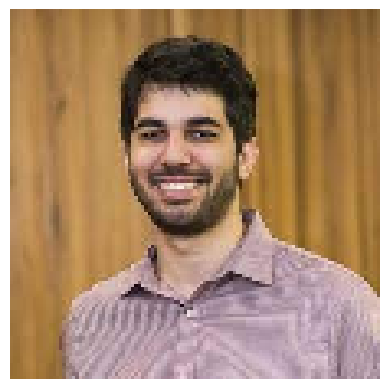

In [33]:
remove_lines("yuri.png")

#### Com Suavização:

Imagino que essa não seja a suavização que você esteja esperando, mas, na minha cabeça, se eu aplicar um filtro, uma função que já foi desenvolvida, com um kernel que faz a média dos nove pontos ao redor, eu acabaria suavizando essa retirada de linhas. Por isso, vou ir por esse caminho ao invés de usar algo da OpenCV.

Resolução da Imagem Original:
(225, 225, 3)
Resolução da Imagem Resultante:
(113, 113, 3)


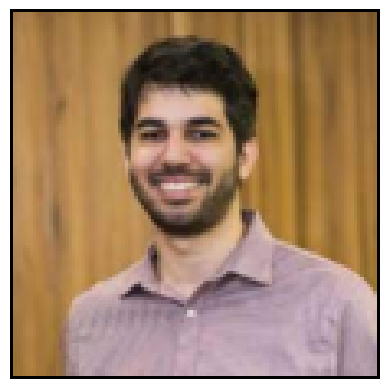

In [32]:
imagem_suavizada = apply_filters("yuri.png", kernel_constante, to_show=False)
remove_lines(imagem_suavizada)

## Questão 05

#### Gaussian Noise

In [21]:
def gaussian_noise(image_path: str = "cabuloso.jpg", mean: int = 0, sigma: int = 25, to_show: bool = True):
    """
    Adiciona ruído gaussiano a uma imagem.

    Args:
        image_path (str): Caminho para a imagem (padrão: "cabuloso.jpg").
        mean (int): Valor médio da distribuição gaussiana (padrão: 0).
        sigma (int): Desvio padrão da distribuição gaussiana (padrão: 25).
        to_show (bool): Se True, exibe a imagem resultante (padrão: True).

    Returns:
        numpy.ndarray or None: Imagem resultante após a adição do ruído gaussiano.
            Retorna None se to_show for False.
    """
    # Carrega a imagem
    image = np.array(Image.open(image_path))

    # Gera ruído gaussiano
    gaussian = np.random.normal(mean, sigma, (image.shape[0], image.shape[1]))

    # Adiciona o ruído aos canais de cor
    noisy_image = np.zeros(image.shape, np.float32)
    noisy_image[:, :, 0] = image[:, :, 0] + gaussian
    noisy_image[:, :, 1] = image[:, :, 1] + gaussian
    noisy_image[:, :, 2] = image[:, :, 2] + gaussian

    # Exibe a imagem resultante
    if to_show:
        plt.imshow(noisy_image.astype(np.uint8))
        plt.axis('off')
        plt.show()
    else:
        return noisy_image

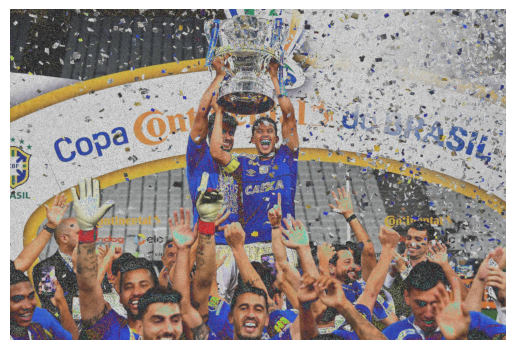

In [22]:
gaussian_noise()

#### Kuwahara Filter

Certamente, existem maneiras mais eficientes de implementar esse filtro, mas a única forma que eu pensei foi essa. Implementei a versão mais simples do filtro, não quis me arriscar nas versões mais avançadas e que geram resultados melhores.

In [23]:
def kuwahara_filter(image_path: str = "ana_de_armas.png", matriz_size: int = 10, to_show: bool = True, b_and_w: bool = True):
    """
    Aplica o filtro de Kuwahara em uma imagem.

    Args:
        image_path (str): O caminho para a imagem de entrada (padrão: "ana_de_armas.png").
        matriz_size (int): O tamanho da matriz quadrada para calcular o filtro (padrão: 10).
        to_show (bool): Se True, exibe a imagem resultante; caso contrário, retorna a imagem como um numpy.ndarray (padrão: True).
        b_and_w (bool): Se True, exibe a imagem em preto e branco; caso contrário, mantém a cor original (padrão: True).

    Returns:
        numpy.ndarray or None: A imagem resultante após a aplicação do filtro de Kuwahara.
            Retorna None se to_show for False.
    """
    # Carrega a imagem
    image = np.array(Image.open(image_path))

    # Inicializa a imagem filtrada com as mesmas dimensões da imagem original
    filtered_image = np.zeros_like(image)

    # Obtém as dimensões da imagem e do kernel
    if len(image.shape) == 3:  # Se a imagem for colorida (RGB)
        image_height, image_width, image_deep = image.shape
    else:  # Se a imagem for em tons de cinza
        image_height, image_width = image.shape
        image_deep = 1

    # Calcula a borda do kernel
    borda_vertical = matriz_size // 2
    borda_horizontal = matriz_size // 2

    # Loop sobre cada pixel da imagem
    for i in range(borda_vertical, image_height - borda_vertical):
        for j in range(borda_horizontal, image_width - borda_horizontal):
            # Seleciona a região da imagem correspondente ao tamanho do kernel
            regiao = image[i - borda_vertical:i + borda_vertical + 1,
                        j - borda_horizontal:j + borda_horizontal + 1]
            
            # Divide a região em quatro quadrantes
            if image_deep == 3:  # Se a imagem for colorida (RGB)
                q1 = regiao[:matriz_size//2, :matriz_size//2, :]
                q2 = regiao[:matriz_size//2, matriz_size//2:, :]
                q3 = regiao[matriz_size//2:, :matriz_size//2, :]
                q4 = regiao[matriz_size//2:, matriz_size//2:, :]
            else:  # Se a imagem for em tons de cinza
                q1 = regiao[:matriz_size//2, :matriz_size//2]
                q2 = regiao[:matriz_size//2, matriz_size//2:]
                q3 = regiao[matriz_size//2:, :matriz_size//2]
                q4 = regiao[matriz_size//2:, matriz_size//2:]

            # Calcula o desvio padrão de cada quadrante
            std_1 = np.std(q1)
            std_2 = np.std(q2)
            std_3 = np.std(q3)
            std_4 = np.std(q4)

            # Encontra o menor desvio padrão entre os quadrantes
            min_std = min(std_1, std_2, std_3, std_4)

            # Seleciona a matriz correspondente ao menor desvio padrão
            if min_std == std_1:
                mat_min_std = q1
            elif min_std == std_2:
                mat_min_std = q2
            elif min_std == std_3:
                mat_min_std = q3
            else:
                mat_min_std = q4

            # Calcula a média da matriz com menor desvio padrão
            min_mean = np.mean(mat_min_std, axis=(0, 1))  # Calcula a média ao longo dos eixos de linha e coluna

            # Atribui a média ao pixel correspondente na imagem filtrada
            filtered_image[i, j] = min_mean

    # Exibe ou retorna a imagem resultante
    if to_show:
        if b_and_w:
            plt.imshow(filtered_image.astype(np.uint8), cmap='gray')
        else:
            plt.imshow(filtered_image.astype(np.uint8))
        plt.axis('off')
        plt.show()
    else:
        return filtered_image

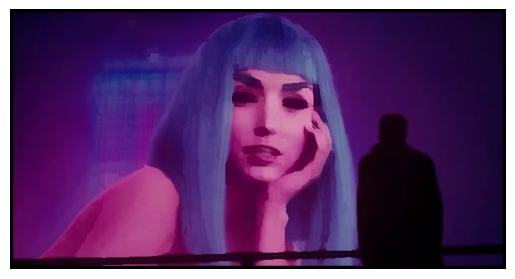

In [24]:
kuwahara_filter()

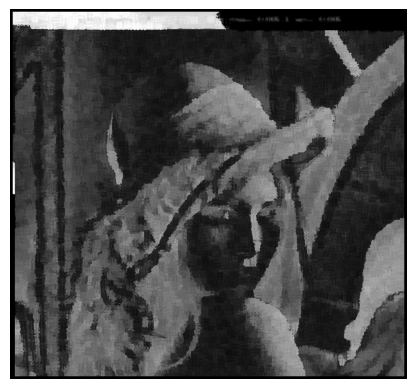

In [25]:
kuwahara_filter(image_path="noise_lady.png")